<a href="https://colab.research.google.com/github/syahla31/PCVK_Ganjil_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laporan Praktikum Pertemuan 3 - Pengolahan Citra dan Visi Komputer**
---
Nama: Syahla' Syafiqah Fayra

NIM: 2141720015

### Langkah Praktikum

1.  Akses folder images pada Google Drive Anda dengan kode berikut:

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Melakukan transformasi linier brightness dengan memasukkan nilai konstanta tertentu dan menghasilkan warna. Seperti yang telah dibahas pada ulasan teori, formula untuk melakukan transformasi linier brightness adalah sebagai berikut:

  𝑔(𝑥, 𝑦) = 𝑓(𝑥, 𝑦) + 𝑏

   dimana g(x,y) adalah nilai pixel setelah transformasi, f(x,y) adalah nilai pixel asli, dan b adalah nilai brightness.

 Mengubah tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan: 50


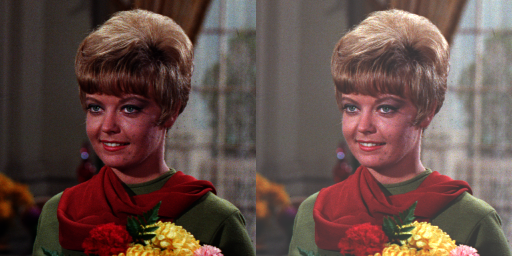

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

### Tugas Praktikum

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

 Implementasi Inverse Citra 


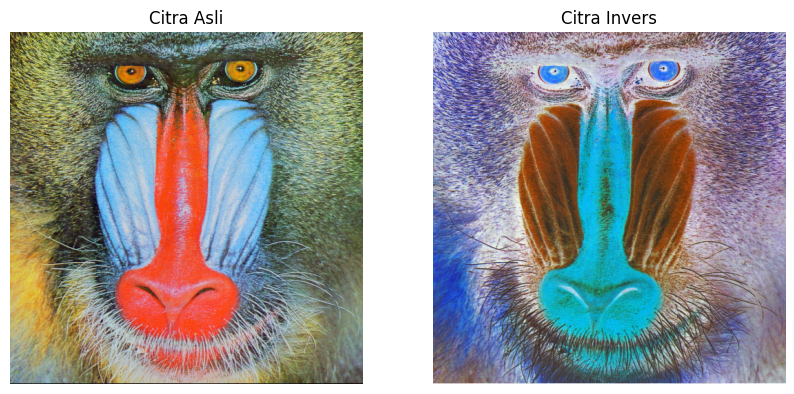

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Implementasi Inverse Citra ')

image_path = ('/content/drive/MyDrive/Images/mandrill.tiff')
image = cv2.imread(image_path)

# Menghitung invers citra
inverted_image = 255 - image

# Citra asli dan invers
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Citra Invers')
plt.imshow(cv2.cvtColor(inverted_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga menghasilkan keluaran seperti berikut:

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0] : 2


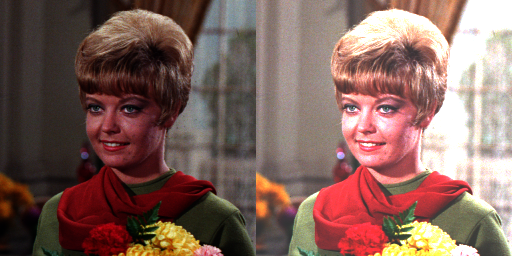

In [10]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------------------')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

try:
    brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
    if brightness < -255 or brightness > 255:
        raise ValueError("Brightness value out of range")
except ValueError:
    print('Error, not a valid number or value out of range')
else:
    try:
        contrast = float(input('Masukkan kontras [1.0 - 3.0] : '))
        if contrast < 1.0 or contrast > 3.0:
            raise ValueError("Contrast value out of range")
    except ValueError:
        print('Error, not a valid number or value out of range')
    else:
        for y in range(original.shape[0]):
          for x in range(original.shape[1]):
            for c in range(original.shape[2]):
              contrast_image[y,x,c] = np.clip(contrast * original[y,x,c] + brightness,0,255)

        final_images = cv.hconcat((original, contrast_image))
        cv2_imshow(final_images)

3.  Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log, sehingga menghasilkan keluaran seperti berikut:

 Mengubah tingkat kecerahan citra dengan Transformasi Log 
----------------------------------------------------------
Masukkan nilai kecerahan: 50


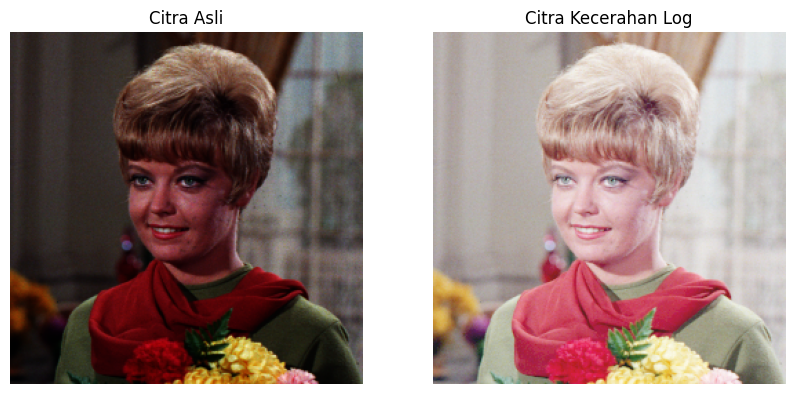

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print(' Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('----------------------------------------------------------')

# Tingkat Kecerahan
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

image_path = ('/content/drive/MyDrive/Images/female.tiff')
image = cv2.imread(image_path)

# Menghitung transformasi kecerahan logaritmik
log_brightness_image = c * np.log(1 + image.astype(float))

# Normalisasi ke dalam rentang 0-255
log_brightness_image = (log_brightness_image / np.max(log_brightness_image) * 255).astype(np.uint8)

# Menampilkan citra asli dan citra dengan transformasi kecerahan logaritmik
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Citra Kecerahan Log')
plt.imshow(cv2.cvtColor(log_brightness_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

  a. Averaging

a. Averaging


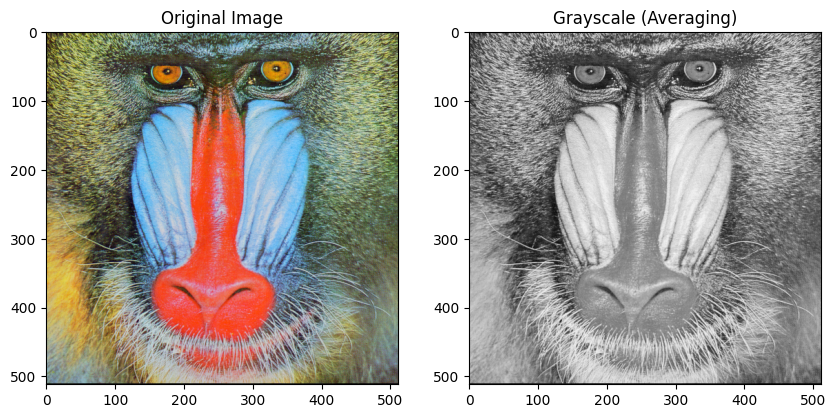

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

base_image = cv2.imread('/content/drive/MyDrive/Images/mandrill.tiff')

# Implementasi Grayscale menggunakan metode Averaging
average_image = np.zeros(base_image.shape[:2], dtype=np.uint8)

for y in range(base_image.shape[0]):
    for x in range(base_image.shape[1]):
        red = int(base_image[y, x, 2])
        green = int(base_image[y, x, 1])
        blue = int(base_image[y, x, 0])
        avg = (red + green + blue) // 3
        average_image[y, x] = np.uint8(avg)

# Tampilkan gambar asli dan hasil transformasi grayscale
plt.figure(figsize=(10, 5))
print('a. Averaging')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(average_image, cmap='gray')
plt.title('Grayscale (Averaging)')


plt.show()

  b. Lightness

b. Lightness


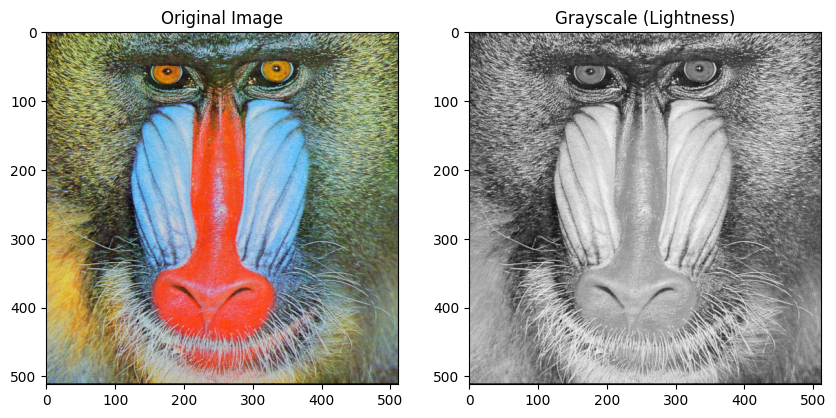

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Baca gambar sumber
base_image = cv2.imread('/content/drive/MyDrive/Images/mandrill.tiff')

# Implementasi Grayscale menggunakan metode Lightness
lightness_image = np.zeros(base_image.shape[:2], dtype=np.uint8)

for y in range(base_image.shape[0]):
    for x in range(base_image.shape[1]):
        red = int(base_image[y, x, 2])
        green = int(base_image[y, x, 1])
        blue = int(base_image[y, x, 0])
        lightness = (max(red, green, blue) + min(red, green, blue)) // 2
        lightness_image[y, x] = np.uint8(lightness)

plt.figure(figsize=(10, 5))

print('b. Lightness')
# Plot Lightness Transformation
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
im = plt.imshow(lightness_image, cmap='gray')
plt.title('Grayscale (Lightness)')

plt.show()

c. Luminance

c. Luminance


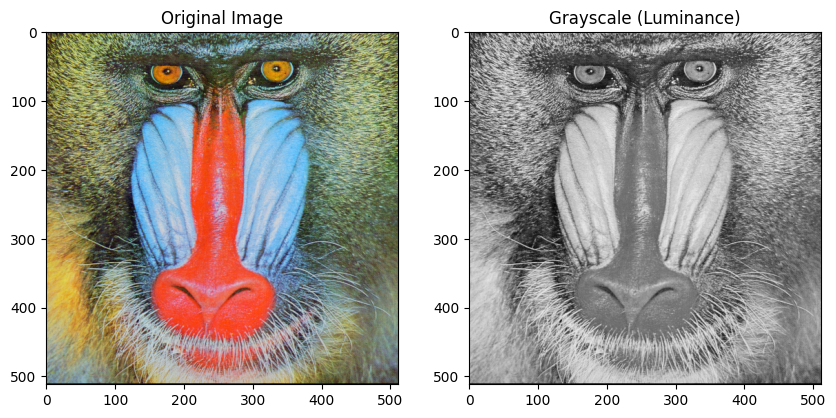

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Baca gambar sumber
base_image = cv2.imread('/content/drive/MyDrive/Images/mandrill.tiff')

# Implementasi Grayscale menggunakan metode Luminance
luminance_image = np.zeros(base_image.shape[:2], dtype=np.uint8)

for y in range(base_image.shape[0]):
    for x in range(base_image.shape[1]):
        red = int(base_image[y, x, 2])
        green = int(base_image[y, x, 1])
        blue = int(base_image[y, x, 0])
        luminance = 0.21 * red + 0.72 * green + 0.07 * blue
        luminance_image[y, x] = np.uint8(luminance)

plt.figure(figsize=(10, 5))

# Plot Luminance Transformation
print('c. Luminance')
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(luminance_image, cmap='gray')
plt.title('Grayscale (Luminance)')

plt.show()

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:

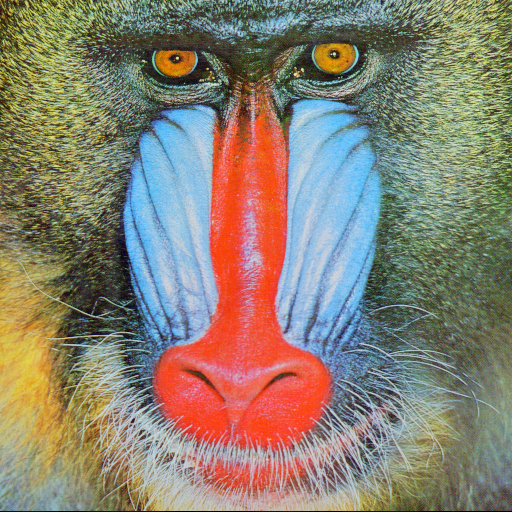

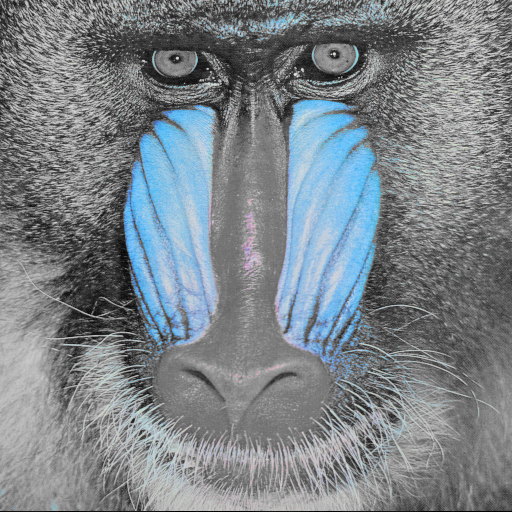

In [81]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

color_img = cv.imread('/content/drive/MyDrive/Images/mandrill.tiff')
cv2_imshow(color_img)
ret, mask = cv.threshold(color_img[:,:,0], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(color_img)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(color_img, mask3)
gray = cv.cvtColor(color_img, cv.COLOR_BGR2GRAY)
color_img = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(color_img, 255 - mask3)

hasil = gray + red

cv2_imshow(hasil)